In [1]:
import pandas as pd
import pip
pip.main(["install", "openpyxl"])
pip.main(["install", "xlrd"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: openpyxl in /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages (3.1.5)

Requirement already satisfied: et-xmlfile in /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages (from openpyxl) (2.0.0)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting xlrd

Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)

Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)

Installing collected packages: xlrd

Successfully installed xlrd-2.0.1

0

In [2]:
global_dir = '/Users/bram/Desktop/Honors Draft for Reviewers'

In [3]:
# Get private non financial firm debt 
def read_pfd_data():
    url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_TC/2.0/Q.AR+AT+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FI+FR+GB+GR+HK+HU+ID+IE+IL+IN+IT+JP+KR+LU+MX+MY+NL+NO+NZ+PL+PT+RU+SA+SE+SG+TH+TR+US+XM+ZA.N.A.M.770.A?startPeriod=1947-01-01&endPeriod=2025-01-01&format=csv"
    df = pd.read_csv(url)
    df = df[df['TC_LENDERS'] != 'B']  # TC_Lenders the B means bank only and A means all so keep all
    df = df[['BORROWERS_CTY', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'BORROWERS_CTY': 'Code', 'OBS_VALUE': 'private_debt'})
    df['TIME_PERIOD'] = (pd.to_datetime(df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
    privatedebt = df.set_index(['Code', 'TIME_PERIOD'])
    return privatedebt
private_firm_debt = read_pfd_data()
private_firm_debt

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_89248/621672162.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME_PERIOD'] = (pd.to_datetime(df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


private_debt
Code TIME_PERIOD              
SA   1998-03-31         17.200
     1998-06-30         19.000
     1998-09-30         22.400
     1998-12-31         24.000
     1999-03-31         19.800
...                        ...
CO   2023-06-30         31.338
     2023-09-30         31.222
     2023-12-31         30.827
     2024-03-31         30.594
     2024-06-30         30.324

[6443 rows x 1 columns]

In [4]:
### Get hhd data
def read_hhd():
    hhd_url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_TC/2.0/Q.AR+AT+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FI+FR+GB+GR+HK+HU+ID+IE+IL+IN+IT+JP+KR+LU+MX+MY+NL+NO+NZ+PL+PT+RU+SA+SE+SG+TH+TR+US+XM+ZA.H.A.M.770.A?startPeriod=1947-01-01&endPeriod=2025-01-01&format=csv"
    hhd_df = pd.read_csv(hhd_url)
    hhd_df = hhd_df[['BORROWERS_CTY', 'TIME_PERIOD', 'OBS_VALUE']].rename(columns={'BORROWERS_CTY': 'Code', 'OBS_VALUE': 'household_debt'})
    hhd_df['TIME_PERIOD'] = (pd.to_datetime(hhd_df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
    hhd_df = hhd_df.set_index(['Code', 'TIME_PERIOD'])
    return hhd_df
hhd_df = read_hhd()

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_89248/3605699895.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hhd_df['TIME_PERIOD'] = (pd.to_datetime(hhd_df['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


In [5]:
hhd_df[hhd_df.index.get_level_values("Code") == "ZA"]

household_debt
Code TIME_PERIOD                
ZA   2008-03-31             44.4
     2008-06-30             43.4
     2008-09-30             42.6
     2008-12-31             41.8
     2009-03-31             41.5
...                          ...
     2023-06-30             34.4
     2023-09-30             34.4
     2023-12-31             34.4
     2024-03-31             34.4
     2024-06-30             34.3

[66 rows x 1 columns]

In [6]:
# def read_policy_rate():
#     policy_rate_url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.AR+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FR+GB+HK+HR+HU+ID+IL+IN+IS+IT+JP+KR+MA+MK+MX+MY+NL+NO+NZ+PE+PH+PL+PT+RO+RS+RU+SA+SE+TH+TR+US+XM+ZA?startPeriod=1944-01-01&endPeriod=2025-01-01&format=csv"
#     policy_rate = (pd.read_csv(policy_rate_url)
#                    .rename(columns={'OBS_VALUE': 'policy_rate', 'REF_AREA': 'Code'})
#                    .loc[:, ['policy_rate', 'Code', 'TIME_PERIOD']]
#                    .dropna())
#     # Convert TIME_PERIOD to datetime and set as index
#     policy_rate['TIME_PERIOD'] = pd.to_datetime(policy_rate['TIME_PERIOD'], format='%Y-%m')
#     policy_rate = policy_rate.set_index('TIME_PERIOD').groupby('Code').resample('QE').mean()
#     return policy_rate
# policyrate = read_policy_rate()

policy_rate_url = "https://stats.bis.org/api/v2/data/dataflow/BIS/WS_CBPOL/1.0/M.AR+AU+BE+BR+CA+CH+CL+CN+CO+CZ+DE+DK+ES+FR+GB+HK+HR+HU+ID+IL+IN+IS+IT+JP+KR+MA+MK+MX+MY+NL+NO+NZ+PE+PH+PL+PT+RO+RS+RU+SA+SE+TH+TR+US+XM+ZA?startPeriod=1944-01-01&endPeriod=2025-01-01&format=csv"
policy_rate = (pd.read_csv(policy_rate_url)
               .rename(columns={'OBS_VALUE': 'policy_rate', 'REF_AREA': 'Code'})
               .loc[:, ['policy_rate', 'Code', 'TIME_PERIOD']]
               .dropna())
# Convert TIME_PERIOD to datetime and set as index
policy_rate['TIME_PERIOD'] = pd.to_datetime(policy_rate['TIME_PERIOD'], format='%Y-%m')
policy_rate = policy_rate.set_index('TIME_PERIOD').groupby('Code').resample('Q').mean()

policy_rate

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_89248/1479463157.py:20: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  policy_rate = policy_rate.set_index('TIME_PERIOD').groupby('Code').resample('Q').mean()


policy_rate
Code TIME_PERIOD             
AR   1993-06-30      0.423333
     1993-09-30      0.400000
     1993-12-31      0.533333
     1994-03-31      0.343333
     1994-06-30      0.660000
...                       ...
ZA   2024-03-31      8.250000
     2024-06-30      8.250000
     2024-09-30      8.166667
     2024-12-31      7.833333
     2025-03-31      7.500000

[7710 rows x 1 columns]

In [7]:
# policy_rate[policy_rate.index.get_level_values("Code") == "ES"]
policy_rate.index.get_level_values("Code").unique()

Index(['AR', 'AU', 'BE', 'BR', 'CA', 'CH', 'CL', 'CN', 'CO', 'CZ', 'DE', 'DK',
       'ES', 'FR', 'GB', 'HK', 'HR', 'HU', 'ID', 'IL', 'IN', 'IS', 'IT', 'JP',
       'KR', 'MA', 'MK', 'MX', 'MY', 'NL', 'NO', 'NZ', 'PE', 'PH', 'PL', 'PT',
       'RO', 'RS', 'RU', 'SA', 'SE', 'TH', 'TR', 'US', 'XM', 'ZA'],
      dtype='object', name='Code')

In [8]:
def read_gdp():
    gdp = pd.read_excel('/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/CleanData/RealGDP.xlsx')  
    gdpdf = pd.DataFrame(
        gdp
            .set_index(['Country', 'Scale'])
            .stack()
    ).reset_index().rename(
        columns={'level_2': 'TIME_PERIOD', 0: 'GDP'}
    )
    gdpdf['TIME_PERIOD'] = (pd.to_datetime(gdpdf['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
    return gdpdf
gdp_df = read_gdp()
gdp_df 

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_89248/855636149.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdpdf['TIME_PERIOD'] = (pd.to_datetime(gdpdf['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


,Country,Scale,TIME_PERIOD,GDP
0,Argentina,Millions,1950-03-31,...
1,Argentina,Millions,1950-06-30,...
2,Argentina,Millions,1950-09-30,...
3,Argentina,Millions,1950-12-31,...
4,Argentina,Millions,1951-03-31,...
...,...,...,...,...
19365,United States,Millions,2023-06-30,5556337.5
19366,United States,Millions,2023-09-30,5622673
19367,United States,Millions,2023-12-31,5669814
19368,United States,Millions,2024-03-31,5689688


In [9]:
urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_SPP/1.0/Q..N.628?format=csv"]

housing_prices = pd.concat([pd.read_csv(url) for url in urls])
housing_prices = housing_prices.rename(columns={'OBS_VALUE': 'housing_price', 'REF_AREA': 'Code'})
housing_prices = housing_prices.loc[:, ['housing_price', 'Code', 'TIME_PERIOD']]
housing_prices['TIME_PERIOD'] = (pd.to_datetime(housing_prices['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))
housing_prices


/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_89248/1273519729.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  housing_prices['TIME_PERIOD'] = (pd.to_datetime(housing_prices['TIME_PERIOD'].str.replace('-', '')) + pd.offsets.QuarterEnd(0))


,housing_price,Code,TIME_PERIOD
0,110.3066,5R,2007-12-31
1,108.8253,5R,2008-03-31
2,107.0285,5R,2008-06-30
3,104.6137,5R,2008-09-30
4,101.1258,5R,2008-12-31
...,...,...,...
8833,253.7933,CO,2023-09-30
8834,244.7049,CO,2023-12-31
8835,267.4832,CO,2024-03-31
8836,265.0267,CO,2024-06-30


In [10]:
hai = pd.read_excel("/Users/bram/Desktop/Honors Draft for Reviewers/Honors-DeepVAR-Household-Debt-Analysis/CleanData/HAI.xls")
hai['TIME_PERIOD'] = pd.to_datetime(hai['Year_Quarter']) + pd.offsets.QuarterEnd()
hai = hai.drop(columns = {'Year_Quarter'})
df_long = hai.melt(id_vars=['TIME_PERIOD'], var_name='Country', value_name='Housing_Affordability')
df_long = df_long.dropna()
df_long

,TIME_PERIOD,Country,Housing_Affordability
0,1970-03-31,Australia,57.165684
1,1970-06-30,Australia,49.039551
2,1970-09-30,Australia,48.977459
3,1970-12-31,Australia,48.734589
4,1971-03-31,Australia,48.593975
...,...,...,...
8595,2022-09-30,United_States,101.056068
8596,2022-12-31,United_States,90.785767
8597,2023-03-31,United_States,93.849350
8598,2023-06-30,United_States,92.270676


In [11]:
def read_exchange_rate():
    urls = ["https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/M.R?format=csv"]
    df = pd.concat([pd.read_csv(url) for url in urls])
    df = df[['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE']]
    df = df.rename(columns = {"REF_AREA": "Code", "OBS_VALUE": "exchange_rate"})
    df['TIME_PERIOD'] = pd.to_datetime(df['TIME_PERIOD'], format='%Y-%m')
    df['Code'] = df['Code'].astype(str)
    df = df.set_index('TIME_PERIOD')
    df = df.groupby('Code').resample('Q').mean()
    return df
exchange_rate_df = read_exchange_rate()

/var/folders/mg/jjtr9hhj5zj6g0svf83l817h0000gn/T/ipykernel_89248/1089055152.py:9: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.groupby('Code').resample('Q').mean()


In [12]:
unique_codes = [
    'NZ', 'DE', 'GR', 'BR', 'TH', 'BE', 'TR', '5A', 'PL', 'NO', 'CZ', 'IT', 'KR', 
    'SG', 'HU', '5R', 'PT', 'IN', 'US', 'NL', 'LU', 'GB', 'ID', 'FI', 'SE', 'CL', 
    'IE', 'ZA', 'SA', 'MX', 'MY', 'FR', 'AR', 'AT', 'IL', 'CH', 'CN', 'ES', '4T', 
    'CO', 'CA', 'AU', 'G2', 'RU', 'DK', 'XM', 'HK', 'JP'
]
code_map = {
    'AL': 'Albania',
    'DZ': 'Algeria',
    'AR': 'Argentina',
    'AM': 'Armenia, Rep. of',
    'AU': 'Australia',
    'AT': 'Austria',
    'AZ': 'Azerbaijan, Rep. of',
    'BS': 'Bahamas, The',
    'BY': 'Belarus, Rep. of',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BA': 'Bosnia and Herzegovina',
    'BW': 'Botswana',
    'BR': 'Brazil',
    'BN': 'Brunei Darussalam',
    'BG': 'Bulgaria',
    'CV': 'Cabo Verde',
    'CM': 'Cameroon',
    'CA': 'Canada',
    'CL': 'Chile',
    'HK': 'China, P.R.: Hong Kong',
    'MO': 'China, P.R.: Macao',
    'CN': 'China, P.R.: Mainland',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'HR': 'Croatia, Rep. of',
    'CY': 'Cyprus',
    'CZ': 'Czech Rep.',
    'DK': 'Denmark',
    'DO': 'Dominican Rep.',
    'EC': 'Ecuador',
    'EG': 'Egypt, Arab Rep. of',
    'SV': 'El Salvador',
    'EE': 'Estonia, Rep. of',
    'EA': 'Euro Area',
    'FI': 'Finland',
    'FR': 'France',
    'GE': 'Georgia',
    'DE': 'Germany',
    'GH': 'Ghana',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HU': 'Hungary',
    'IS': 'Iceland',
    'IN': 'India',
    'ID': 'Indonesia',
    'IR': 'Iran, Islamic Rep. of',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'JP': 'Japan',
    'JO': 'Jordan',
    'KZ': 'Kazakhstan, Rep. of',
    'KE': 'Kenya',
    'KR': 'Korea, Rep. of',
    'XK': 'Kosovo, Rep. of',
    'KG': 'Kyrgyz Rep.',
    'LV': 'Latvia',
    'LS': 'Lesotho, Kingdom of',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'MY': 'Malaysia',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MD': 'Moldova, Rep. of',
    'MN': 'Mongolia',
    'ME': 'Montenegro',
    'NA': 'Namibia',
    'NL': 'Netherlands, The',
    'NZ': 'New Zealand',
    'NI': 'Nicaragua',
    'NG': 'Nigeria',
    'MK': 'North Macedonia, Republic of',
    'NO': 'Norway',
    'PY': 'Paraguay',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland, Rep. of',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RU': 'Russian Federation',
    'RW': 'Rwanda',
    'WS': 'Samoa',
    'SA': 'Saudi Arabia',
    'SN': 'Senegal',
    'RS': 'Serbia, Rep. of',
    'SC': 'Seychelles',
    'SG': 'Singapore',
    'SK': 'Slovak Rep.',
    'SI': 'Slovenia, Rep. of',
    'ZA': 'South Africa',
    'ES': 'Spain',
    'LK': 'Sri Lanka',
    'LC': 'St. Lucia',
    'VC': 'St. Vincent and the Grenadines',
    'SE': 'Sweden',
    'CH': 'Switzerland',
    'TH': 'Thailand',
    'TT': 'Trinidad and Tobago',
    'TR': 'Türkiye, Rep of',
    'UG': 'Uganda',
    'UA': 'Ukraine',
    'GB': 'United Kingdom',
    'US': 'United States',
    'UY': 'Uruguay',
    'PS': 'West Bank and Gaza'
}

def map_country2codes(unique_codes, code_map):
    # Create a DataFrame from unique items
    df_unique = pd.DataFrame(unique_codes, columns=['Code'])
    # Map the country names based on the codes
    df_unique['Country'] = df_unique['Code'].map(code_map)
    return df_unique
countrycode_df = map_country2codes(unique_codes, code_map)

In [32]:
merged_df = pd.merge(private_firm_debt.reset_index(), hhd_df.reset_index(), on=['Code', 'TIME_PERIOD'], how='outer')
merge_er = pd.merge(merged_df, exchange_rate_df, on=['Code', 'TIME_PERIOD'], how='outer')    
new_df = pd.merge(merge_er, countrycode_df, on=['Code'], how='outer')
merge_gdp = pd.merge(new_df, gdp_df, on=['Country', 'TIME_PERIOD'], how='outer')
merge_hp =  pd.merge(merge_gdp, housing_prices, on=['Code', 'TIME_PERIOD'], how='outer')
merge_pr = pd.merge(merge_hp, policy_rate, on=['Code', 'TIME_PERIOD'], how='outer')
final_df = pd.merge(merge_pr, df_long, on=['Country', 'TIME_PERIOD'], how='outer')
final_df


,Code,TIME_PERIOD,private_debt,household_debt,exchange_rate,Country,Scale,GDP,housing_price,policy_rate,Housing_Affordability
0,NaN,1950-03-31,NaN,NaN,NaN,Argentina,Millions,...,NaN,NaN,NaN
1,NaN,1950-06-30,NaN,NaN,NaN,Argentina,Millions,...,NaN,NaN,NaN
2,NaN,1950-09-30,NaN,NaN,NaN,Argentina,Millions,...,NaN,NaN,NaN
3,NaN,1950-12-31,NaN,NaN,NaN,Argentina,Millions,...,NaN,NaN,NaN
4,NaN,1951-03-31,NaN,NaN,NaN,Argentina,Millions,...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26293,RS,2025-03-31,NaN,NaN,114.410,NaN,NaN,NaN,NaN,5.75,NaN
26294,SI,2025-03-31,NaN,NaN,99.710,NaN,NaN,NaN,NaN,NaN,NaN
26295,SK,2025-03-31,NaN,NaN,109.840,NaN,NaN,NaN,NaN,NaN,NaN
26296,TW,2025-03-31,NaN,NaN,98.515,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
def cleandata(finaldf):
    cleaneddf = finaldf.copy()
    cleaneddf.set_index('TIME_PERIOD', inplace=True)
    cleaneddf = cleaneddf[cleaneddf['GDP'] != '...']
    cleaneddf['GDP'] = cleaneddf['GDP'].astype(float)
    cleaneddf['exchange_rate'] = cleaneddf['exchange_rate'].astype(float)
    cleaneddf = cleaneddf.drop(columns ={"Scale"})
    # cleaneddf.dropna(subset=['policy_rate'], inplace=True)
    cleaneddf = cleaneddf.dropna(subset=['Code'])
    # cleaneddf = cleaneddf.drop(columns = {"TIME_PERIOD"})
    return cleaneddf

cleaned_df = cleandata(final_df)

In [34]:
def create_excel(df):
    df.to_csv("DataAnalysisData.csv", index=True)
create_excel(cleaned_df)

In [69]:
cleaned_df = cleandata(merge_gdp)

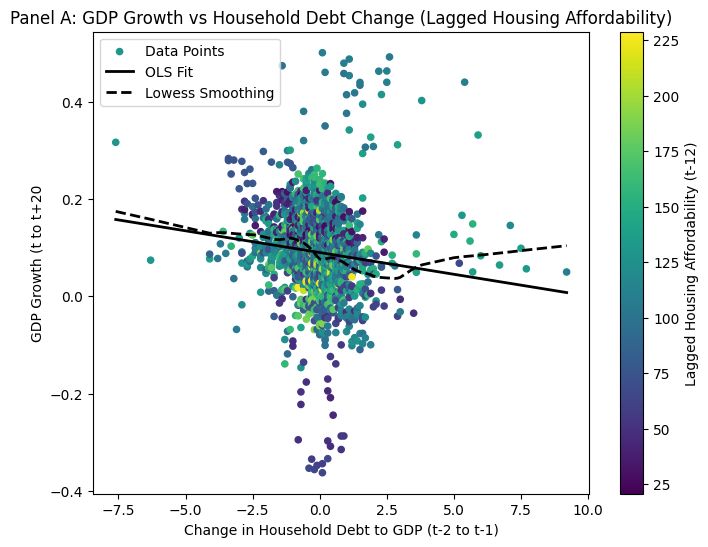

In [41]:
df = cleandata(final_df)
GDP_LAG = 20
HHD_LAG = 12
Price_LAG = HHD_LAG 

df = df.reset_index()
df.sort_values(by=['Country', 'TIME_PERIOD'], inplace=True)

df['lnGDP'] = np.log(df['GDP'])
df['GDP_growth'] = df.groupby('Country')['lnGDP'].diff(periods= GDP_LAG )
df['household_debt_GDP_change'] = df.groupby('Country')['household_debt'].shift(-1) - df.groupby('Country')['household_debt'].shift(- HHD_LAG)

df = df.dropna(subset=['GDP_growth', 'household_debt_GDP_change'])
df[df['Country'] == 'United States']
df['housing_affordability_lagged'] = df.groupby('Country')['Housing_Affordability'].shift(LAG)

df = df.dropna(subset=['housing_affordability_lagged'])

# Panel A: Lowess smoothing for GDP growth and household debt to GDP change
lowess_result = sm.nonparametric.lowess(df['GDP_growth'], df['household_debt_GDP_change'], frac=0.3)
df['GDP_growth_lowess'] = np.interp(df['household_debt_GDP_change'], lowess_result[:, 0], lowess_result[:, 1])

df = df.sort_values('household_debt_GDP_change')


fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(df['household_debt_GDP_change'], df['GDP_growth'], 
                     c=df['housing_affordability_lagged'], cmap='viridis', label='Data Points', s=20, marker='o')

X = df['household_debt_GDP_change'].values.reshape(-1, 1)
y = df['GDP_growth']
model = sm.OLS(y, sm.add_constant(X)).fit()


ax.plot(df['household_debt_GDP_change'], model.predict(sm.add_constant(df['household_debt_GDP_change'].values.reshape(-1, 1))), 
        color='black', lw=2, label='OLS Fit')

ax.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(f'Lagged Housing Affordability (t-{LAG})')

ax.set_xlabel(f"Change in Household Debt to GDP (t-{HHD_LAG} to t-1)")
ax.set_ylabel(f"GDP Growth (t to t+{GDP_LAG}")
ax.legend()
ax.set_title("Panel A: GDP Growth vs Household Debt Change (Lagged Housing Affordability)")

plt.show()

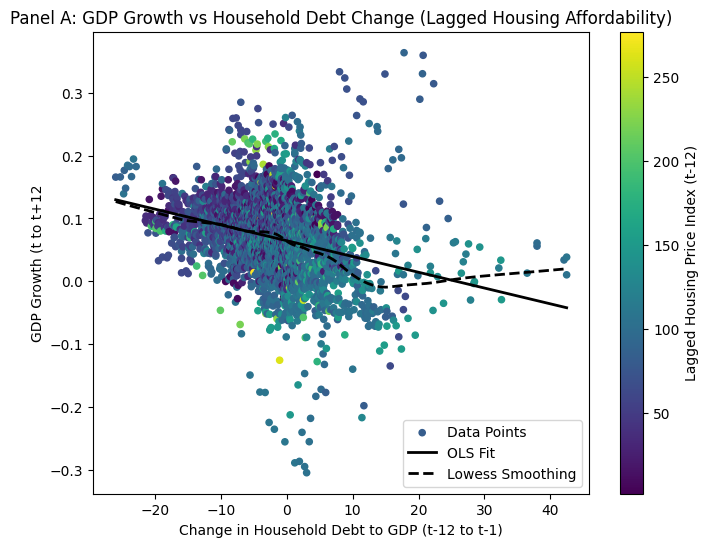

In [49]:
cleaned_df = cleandata(merge_hp)


GDP_LAG = 12
HHD_LAG = 12
Price_LAG = HHD_LAG

cleaned_df = cleaned_df.reset_index()
cleaned_df.sort_values(by=['Country', 'TIME_PERIOD'], inplace=True)

cleaned_df['lnGDP'] = np.log(cleaned_df['GDP'])
cleaned_df['GDP_growth'] = cleaned_df.groupby('Country')['lnGDP'].diff(periods= GDP_LAG )
cleaned_df['household_debt_GDP_change'] = cleaned_df.groupby('Country')['household_debt'].shift(-1) - cleaned_df.groupby('Country')['household_debt'].shift(-HHD_LAG)

cleaned_df = cleaned_df.dropna(subset=['GDP_growth', 'household_debt_GDP_change'])
cleaned_df[cleaned_df['Country'] == 'United States']
cleaned_df['housing_price_lagged'] = cleaned_df.groupby('Country')['housing_price'].shift(Price_LAG)

cleaned_df = cleaned_df.dropna(subset=['housing_price_lagged'])

# Panel A: Lowess smoothing for GDP growth and household debt to GDP change
lowess_result = sm.nonparametric.lowess(cleaned_df['GDP_growth'], cleaned_df['household_debt_GDP_change'], frac=0.3)
cleaned_df['GDP_growth_lowess'] = np.interp(cleaned_df['household_debt_GDP_change'], lowess_result[:, 0], lowess_result[:, 1])

cleaned_df = cleaned_df.sort_values('household_debt_GDP_change')


fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(cleaned_df['household_debt_GDP_change'], cleaned_df['GDP_growth'], 
                     c=cleaned_df['housing_price_lagged'], cmap='viridis', label='Data Points', s=20, marker='o')

X = cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1)
y = cleaned_df['GDP_growth']
model = sm.OLS(y, sm.add_constant(X)).fit()


ax.plot(cleaned_df['household_debt_GDP_change'], model.predict(sm.add_constant(cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1))), 
        color='black', lw=2, label='OLS Fit')

ax.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(f'Lagged Housing Price Index (t-{Price_LAG})')

ax.set_xlabel(f"Change in Household Debt to GDP (t-{HHD_LAG} to t-1)")
ax.set_ylabel(f"GDP Growth (t to t+{GDP_LAG}")
ax.legend()
ax.set_title("Panel A: GDP Growth vs Household Debt Change (Lagged Housing Affordability)")

plt.show()

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select lagged housing price column and household debt
lagged_column = 'housing_price_lagged_1'  # Change as needed
debt_column = 'household_debt'

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df[lagged_column], y=cleaned_df[debt_column], hue=cleaned_df['Country'], palette='viridis', s=50, alpha=0.6)

# Optional: Fit Lowess or regression line for smoothing
import statsmodels.api as sm
lowess_result = sm.nonparametric.lowess(cleaned_df[debt_column], cleaned_df[lagged_column], frac=0.3)
plt.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)

# Labels and Title
plt.xlabel(f'Lagged Housing Prices ({lagged_column})')
plt.ylabel('Household Debt')
plt.title(f'Effect of Lagged Housing Prices on Household Debt (Lag {1})')
plt.legend()
plt.show()


KeyError: 'housing_price_lagged_1'

<Figure size 1000x600 with 0 Axes>

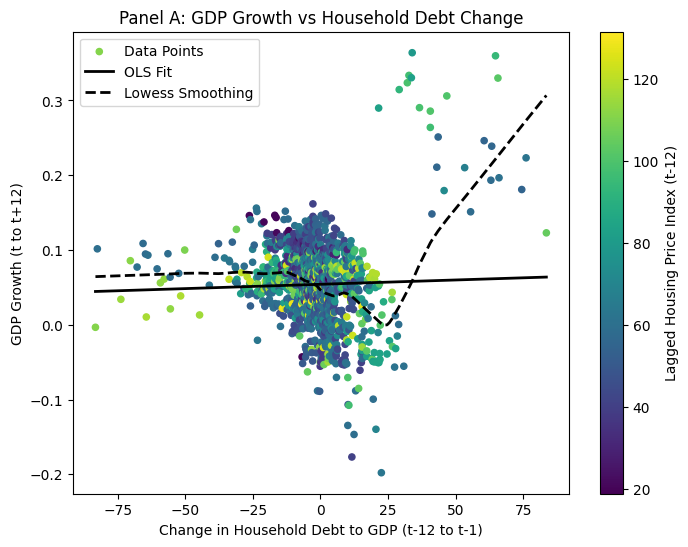

In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_gdp_growth_vs_household_debt(cleaned_df, GDP_column, HHD_column, column_3,
                                      GDP_LAG=12, HHD_LAG=12, variable_3_lag
                                      =12, lowess_frac=0.3, panel_title="GDP Growth vs Household Debt Change"):
    cleaned_df = cleaned_df.reset_index()
    cleaned_df.sort_values(by=['Country', 'TIME_PERIOD'], inplace=True)
    
    cleaned_df['lnGDP'] = np.log(cleaned_df[GDP_column])
    cleaned_df['GDP_growth'] = cleaned_df.groupby('Country')['lnGDP'].diff(periods=GDP_LAG)
    cleaned_df['household_debt_GDP_change'] = cleaned_df.groupby('Country')[HHD_column].shift(-1) - cleaned_df.groupby('Country')[HHD_column].shift(-HHD_LAG)
    
    cleaned_df = cleaned_df.dropna(subset=['GDP_growth', 'household_debt_GDP_change'])
    
    cleaned_df['housing_price_lagged'] = cleaned_df.groupby('Country')[column_3].shift(variable_3_lag
    )
    
    
    cleaned_df = cleaned_df.dropna(subset=['housing_price_lagged'])
    
    lowess_result = sm.nonparametric.lowess(cleaned_df['GDP_growth'], cleaned_df['household_debt_GDP_change'], frac=lowess_frac)
    cleaned_df['GDP_growth_lowess'] = np.interp(cleaned_df['household_debt_GDP_change'], lowess_result[:, 0], lowess_result[:, 1])
    
    
    cleaned_df = cleaned_df.sort_values('household_debt_GDP_change')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    scatter = ax.scatter(cleaned_df['household_debt_GDP_change'], cleaned_df['GDP_growth'], 
                         c=cleaned_df['housing_price_lagged'], cmap='viridis', label='Data Points', s=20, marker='o')

    
    X = cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1)
    y = cleaned_df['GDP_growth']
    model = sm.OLS(y, sm.add_constant(X)).fit()
    
    
    ax.plot(cleaned_df['household_debt_GDP_change'], model.predict(sm.add_constant(cleaned_df['household_debt_GDP_change'].values.reshape(-1, 1))), 
            color='black', lw=2, label='OLS Fit')
    
    
    ax.plot(lowess_result[:, 0], lowess_result[:, 1], linestyle='--', color='black', label='Lowess Smoothing', lw=2)
    
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(f'Lagged Housing Price Index (t-{variable_3_lag})')
    
    ax.set_xlabel(f"Change in Household Debt to GDP (t-{HHD_LAG} to t-1)")
    ax.set_ylabel(f"GDP Growth (t to t+{GDP_LAG})")
    ax.legend()
    ax.set_title(panel_title)
    
    plt.show()

plot_gdp_growth_vs_household_debt(
    df,
    GDP_column='GDP', 
    HHD_column='private_debt', 
    column_3='household_debt',
    GDP_LAG=12,
    HHD_LAG=12,
    variable_3_lag
    =12,
    lowess_frac=0.3,
    panel_title="Panel A: GDP Growth vs Household Debt Change"
)

In [57]:
df

,TIME_PERIOD,Code,private_debt,household_debt,exchange_rate,Country,GDP,housing_price,policy_rate,Housing_Affordability,lnGDP,GDP_growth,household_debt_GDP_change,housing_affordability_lagged,GDP_growth_lowess
2659,2016-09-30,IE,247.0,56.2,102.523333,Ireland,58059.960521,103.1852,NaN,109.106453,10.969232,0.316460,-7.6,129.755219,0.174570
3981,2023-03-31,NO,130.2,76.0,96.378333,Norway,797760.262966,183.0664,2.833333,137.064499,13.589563,0.074373,-6.3,130.910583,0.158334
3968,2019-12-31,NO,142.6,103.3,104.541667,Norway,761354.050575,150.7682,1.500000,130.594833,13.542854,0.077073,-4.1,138.868896,0.129747
911,2019-12-31,CA,117.6,103.5,101.581667,Canada,563838.500000,180.4464,1.750000,75.902100,13.242523,0.086741,-4.1,87.887207,0.129747
868,2009-03-31,CA,85.6,85.4,105.160000,Canada,449802.812500,88.4547,0.833333,113.190361,13.016565,0.077824,-3.8,99.993752,0.130966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,2022-03-31,NO,136.8,88.4,106.408333,Norway,777610.003426,183.1971,0.583333,177.753433,13.563980,0.064383,6.7,135.839890,0.088827
2651,2014-09-30,IE,188.2,82.9,108.260000,Ireland,48066.304490,88.3681,NaN,111.401512,10.780337,0.145739,7.1,119.862053,0.091334
3975,2021-09-30,NO,154.8,103.6,104.685000,Norway,785291.074685,178.4897,0.083333,152.192703,13.573810,0.098785,7.5,135.609268,0.093913
3974,2021-06-30,NO,161.4,109.3,106.841667,Norway,755179.993390,179.1435,0.000000,140.495331,13.534711,0.056612,7.7,133.363388,0.095202
